<a href="https://colab.research.google.com/github/sweety001/Leveraging-Artificial-Intelligence-models-for-analyzing-the-effect-of-Covid-vaccination/blob/main/ARIMA_Model_(number_of_new_cases_per_thousand_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf 
# from statsmodels.tsa.arima_model import ARIMA
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DataCovid = pd.read_csv("/content/drive/MyDrive/DataSet/new_owid-covid-data.csv")
DataCovid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [5]:
DataCovid.shape

(100181, 60)

In [6]:
DataCovid['new_tests_perthousand'] = DataCovid['new_tests']/1000
DataCovid['new_cases_perthousand'] = DataCovid['new_cases']/1000
DataCovid['new_deaths_perthousand'] = DataCovid['new_deaths']/1000
def vaccine_status(x):
  if x > 0:
    return 1
  else:
    return 0 
DataCovid['is_vaccinated'] = DataCovid['people_vaccinated_per_hundred'].apply(vaccine_status)

In [7]:
DataCovid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,new_tests_perthousand,new_cases_perthousand,new_deaths_perthousand,is_vaccinated
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.001,NaN,0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0


In [8]:
DataCovid.insert(loc=0, column='A', value=np.arange(len(DataCovid)))
DataCovid.head()

,A,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,new_tests_perthousand,new_cases_perthousand,new_deaths_perthousand,is_vaccinated
0,0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.001,NaN,0
1,1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0
2,2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0
3,3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0
4,4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,0.000,NaN,0


In [9]:
InpData = DataCovid[['A', 'date', 'location', 'new_cases_perthousand', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index','new_tests_perthousand']]
InpData.head()
InpIndia1 = InpData[InpData['location'] == 'India']
InpIndia1.isna().any()


A                                      False
date                                   False
location                               False
new_cases_perthousand                  False
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
stringency_index                        True
new_tests_perthousand                   True
dtype: bool

In [12]:
# InpIndia1.dropna(inplace=True)
# InpIndia1.shape
# InpIndia1.isna().any()

In [13]:
rcParams['figure.figsize'] = 15,6
import warnings
warnings.filterwarnings('ignore')

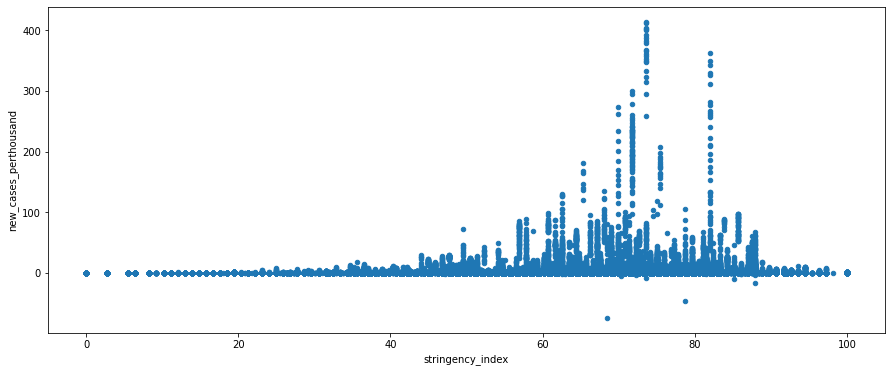

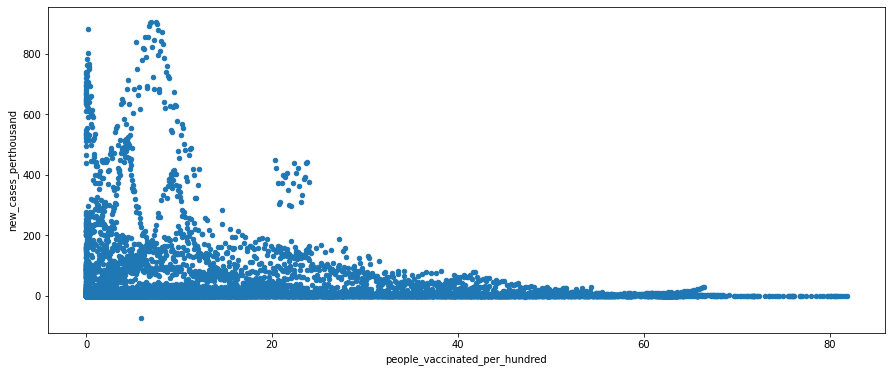

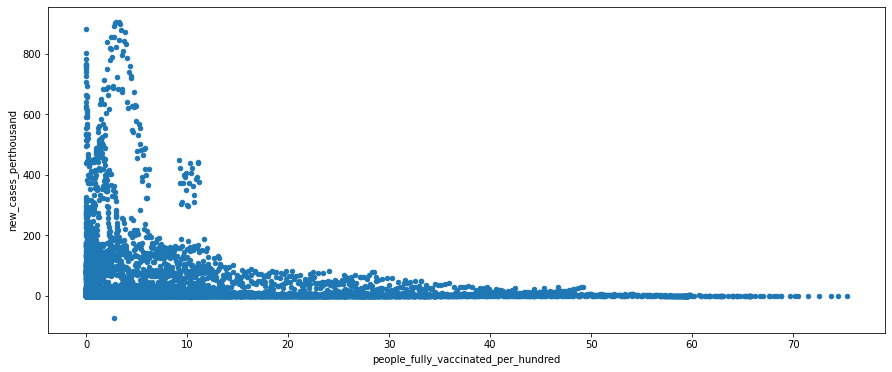

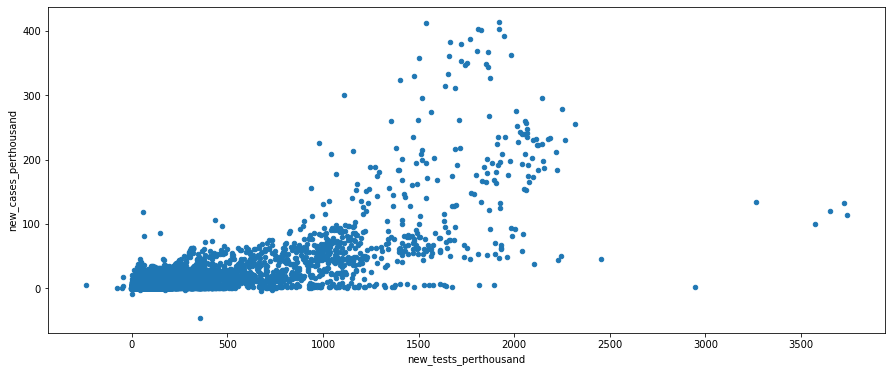

In [14]:
InpData.plot(kind= 'scatter', x = 'stringency_index', y='new_cases_perthousand')
InpData.plot(kind= 'scatter', x = 'people_vaccinated_per_hundred', y='new_cases_perthousand')
InpData.plot(kind= 'scatter', x = 'people_fully_vaccinated_per_hundred', y='new_cases_perthousand')
InpData.plot(kind= 'scatter', x = 'new_tests_perthousand', y='new_cases_perthousand')

In [15]:
data = InpIndia1
data['date'].head()

41440    2020-01-30
41441    2020-01-31
41442    2020-02-01
41443    2020-02-02
41444    2020-02-03
Name: date, dtype: object

In [16]:
#data['date']=data['date'].apply(lambda x: dt(int(x[:2]), int(x[5:]), 15 ))
#InDate=data['date'] 
data = data.set_index('date')
data.tail()

,A,location,new_cases_perthousand,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,new_tests_perthousand
date,,,,,,,
2021-06-30,41957,India,48.786,19.67,4.18,NaN,1960.757
2021-07-01,41958,India,46.617,19.98,4.28,NaN,1921.450
2021-07-02,41959,India,44.111,20.02,4.30,NaN,2230.026
2021-07-03,41960,India,43.071,20.45,4.50,NaN,NaN
2021-07-04,41961,India,0.000,NaN,NaN,NaN,NaN


In [17]:
ts = data['new_cases_perthousand']

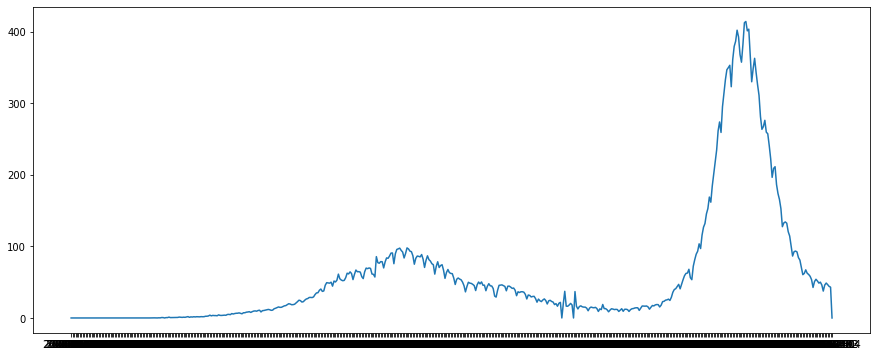

In [18]:
plt.plot(ts)

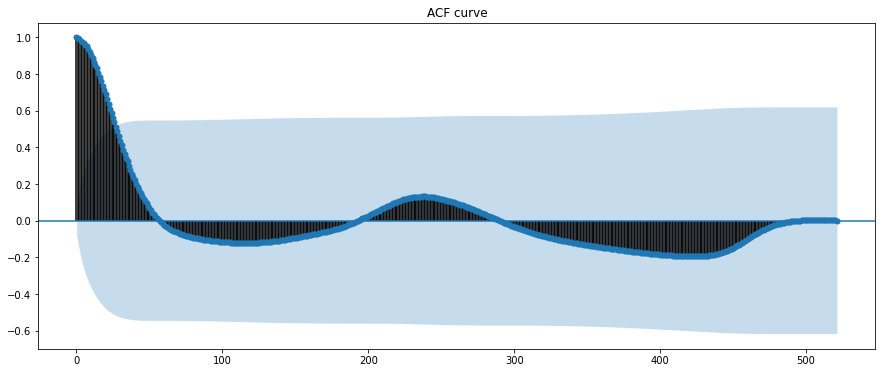

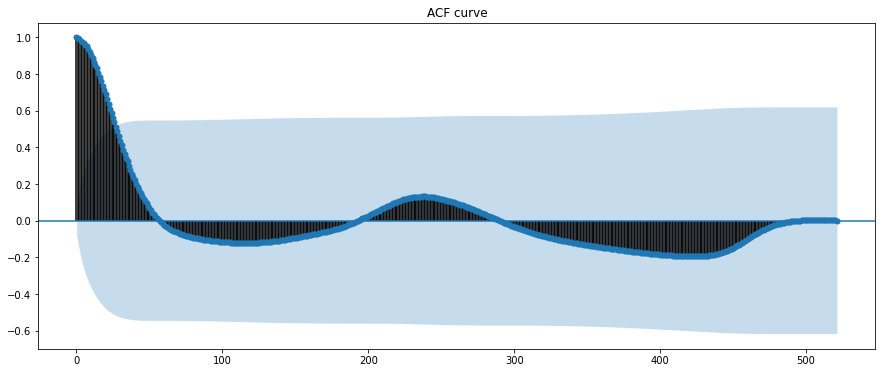

In [19]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(ts,lags=np.arange(len(ts)),alpha=0.05,title ="ACF curve")

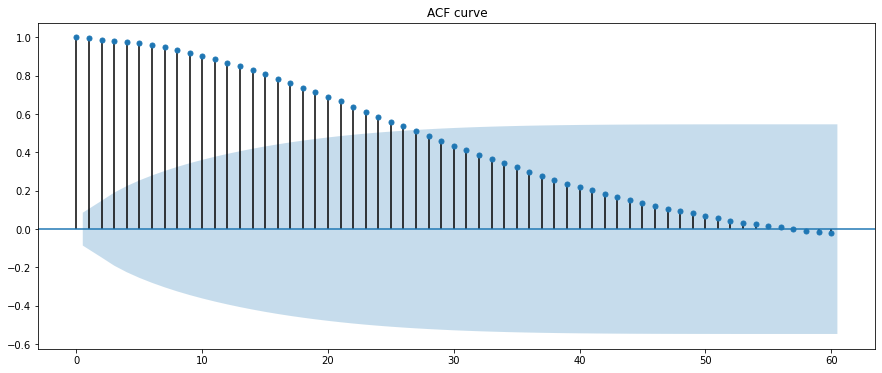

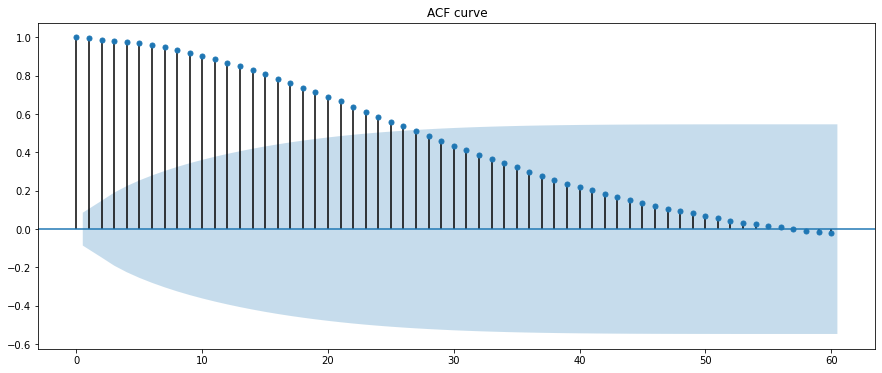

In [20]:
tsa.plot_acf(ts,lags=60,alpha=0.05,title ="ACF curve")

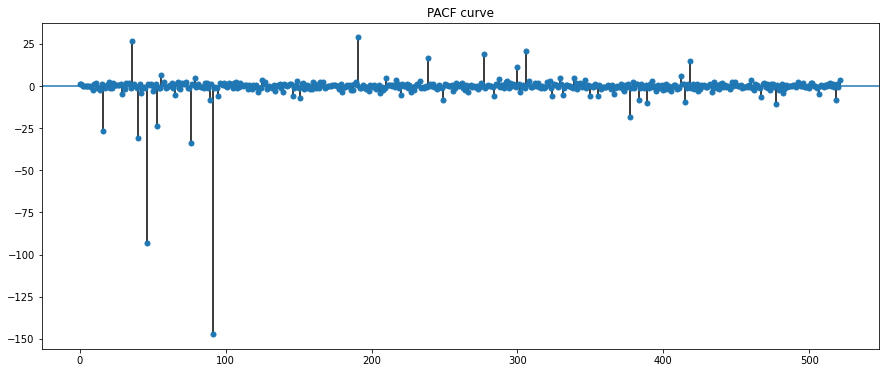

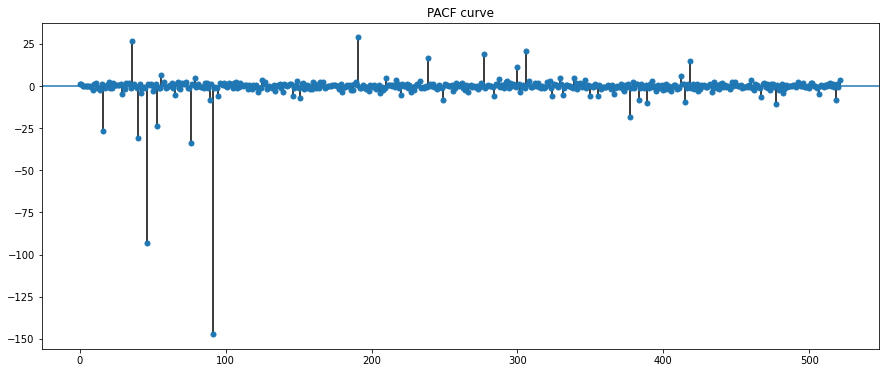

In [21]:
tsa.plot_pacf(ts,lags=np.arange(len(ts)),alpha=0.05,title ="PACF curve")

In [22]:
#Ljung box test to check for white noise
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(data['new_cases_perthousand'],lags=[500],boxpierce=True)
# p value is 0 therefore the null hypothesis that time series is a white noise can be rejected

(array([21282.70305884]), array([0.]), array([13290.81831165]), array([0.]))

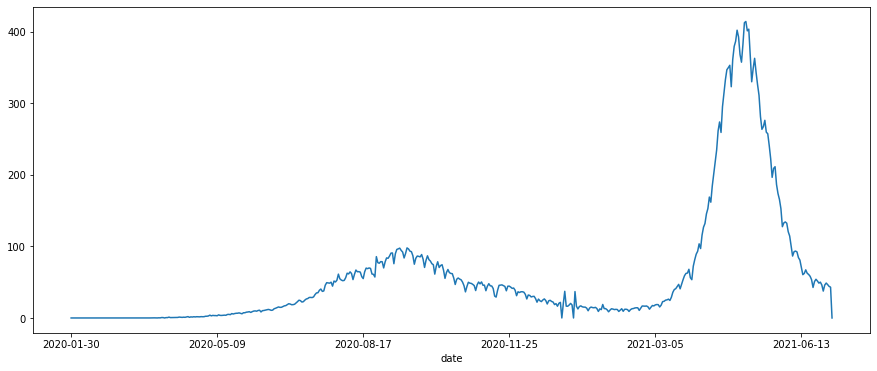

In [23]:
ts.plot()
plt.show()

In [24]:
# trying first differencing 
diff_Y_i = ts.diff()
#dropping the NaN values
diff_Y_i = diff_Y_i.dropna()

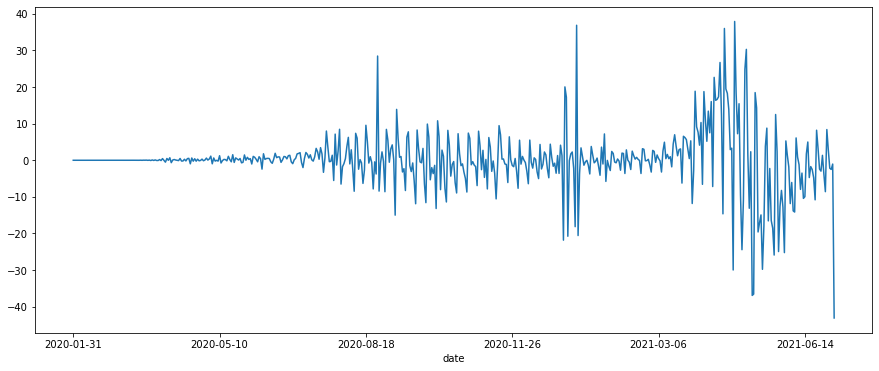

In [25]:
#ploting the differenced values
diff_Y_i.plot()
plt.show()

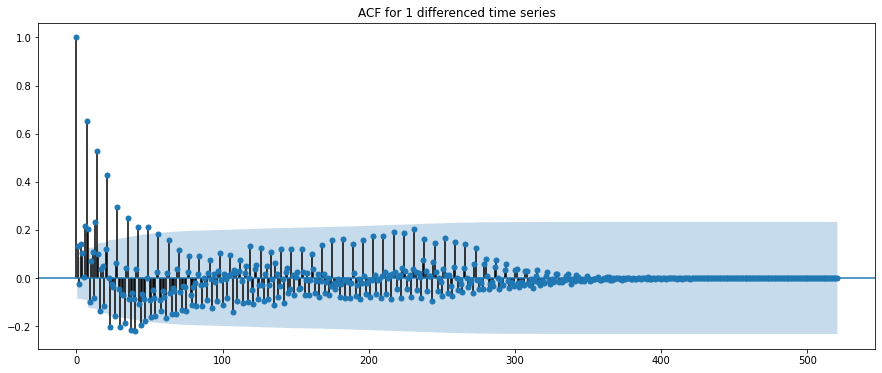

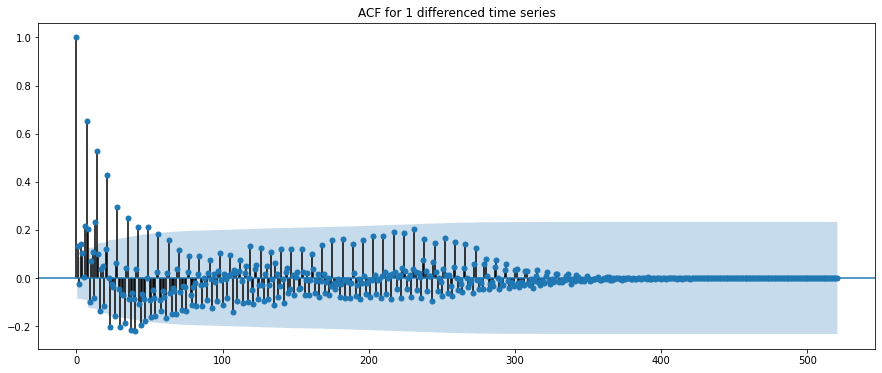

In [26]:
# acf and pacf plots for differenced time series
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(diff_Y_i,lags=np.arange(len(diff_Y_i)),alpha=0.05,title ="ACF for 1 differenced time series")

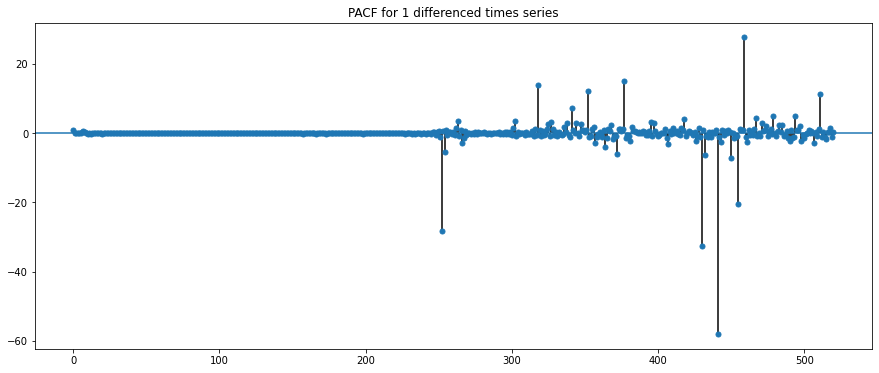

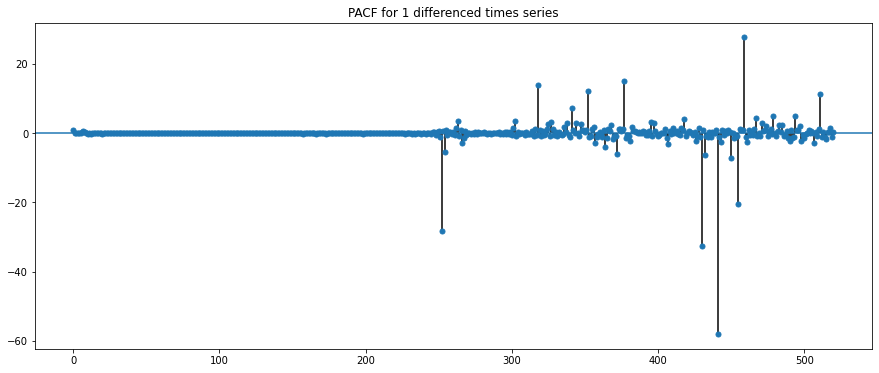

In [27]:
# pacf for differenced values
tsa.plot_pacf(diff_Y_i,lags=np.arange(len(diff_Y_i)),alpha=0.05,title ="PACF for 1 differenced times series")

In [28]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(diff_Y_i,lags=[500],boxpierce=True)
# p value is less than 0.05 therefore the null hypothesis that time series is a white noise can be rejected
# time series is not a white noise

(array([2067.65946382]),
 array([4.16015871e-189]),
 array([1657.78438067]),
 array([5.833028e-124]))

In [29]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(window = 52, center = False).mean()
  rolstd = timeseries.rolling(window = 52, center = False).std()

  orig = plt.plot(timeseries, color = 'blue', label = 'Original')
  mean = plt.plot(timeseries, color = 'red', label = 'Rolling Mean')
  std = plt.plot(timeseries, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)

  print('Results of Dickey Fuller Test: ')
  dftest = adfuller(timeseries, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test-Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])

  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

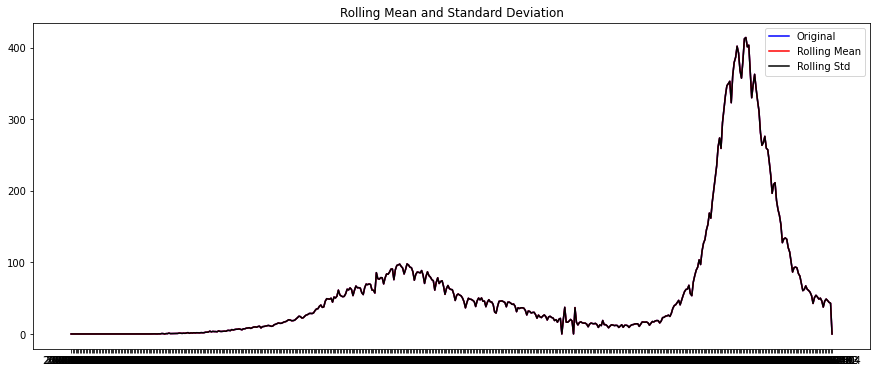

Results of Dickey Fuller Test: 
Test-Statstic                   -3.276272
p-value                          0.015973
#Lags Used                      14.000000
Number of Observations Used    507.000000
Critical Value (1%)             -3.443314
Critical Value (5%)             -2.867258
Critical Value (10%)            -2.569815
dtype: float64


In [30]:
test_stationarity(data['new_cases_perthousand'])

In [31]:
# pvalue is less than 0.05 and test statistic is also less than than 5% critical value therefore we can reject the null hypothesis that it is non stationary 
# time series is stationary 

In [43]:
from statsmodels.tsa.arima_model import ARIMA
model2 = ARIMA(ts, order = (1,0,10))
result = model2.fit(disp=0)

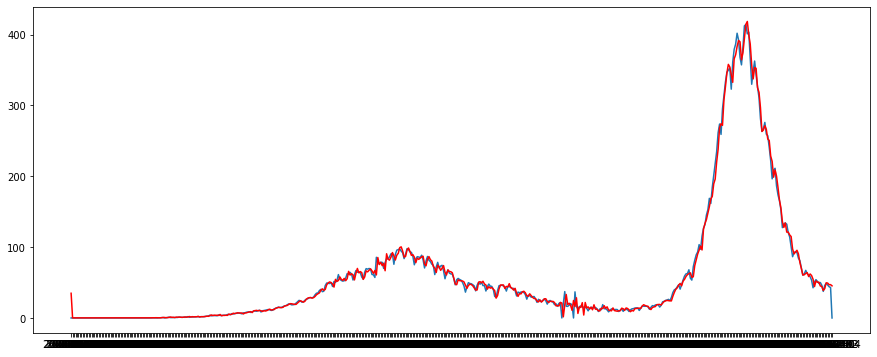

In [44]:
# results_ARIMA = model.fit(disp =0 )
plt.plot(ts)
plt.plot(result.fittedvalues, color ='red')
# plt.title('RSS: %4f'%sum((results_ARIMA.fittedvalues[1:]-ts)**2))

In [45]:
print(result.summary())

                                ARMA Model Results                               
Dep. Variable:     new_cases_perthousand   No. Observations:                  522
Model:                       ARMA(1, 10)   Log Likelihood               -1699.116
Method:                          css-mle   S.D. of innovations              6.179
Date:                   Sun, 29 Aug 2021   AIC                           3424.232
Time:                           04:33:55   BIC                           3479.581
Sample:                       01-30-2020   HQIC                          3445.911
                            - 07-04-2021                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           34.8934     46.309      0.753      0.452     -55.871     125.658
ar.L1.new_cases_perthousand      0.9899      0.006   

(array([[0.        , 0.13592417, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.13592417, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([-45.3292049 , -37.97216181, -30.61511872, -23.25807563,
        -15.90103254,  -8.54398945,  -1.18694636,   6.17009673,
         13.52713982,  20.88418291,  28.241226  ]),
 <a list of 522 Lists of Patches objects>)

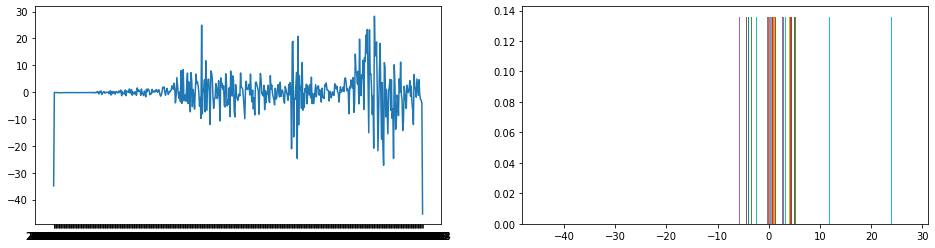

In [46]:
#plotting the residuals
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

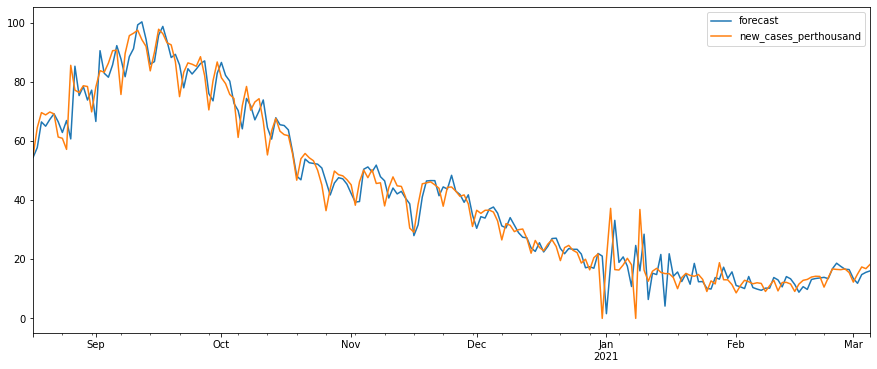

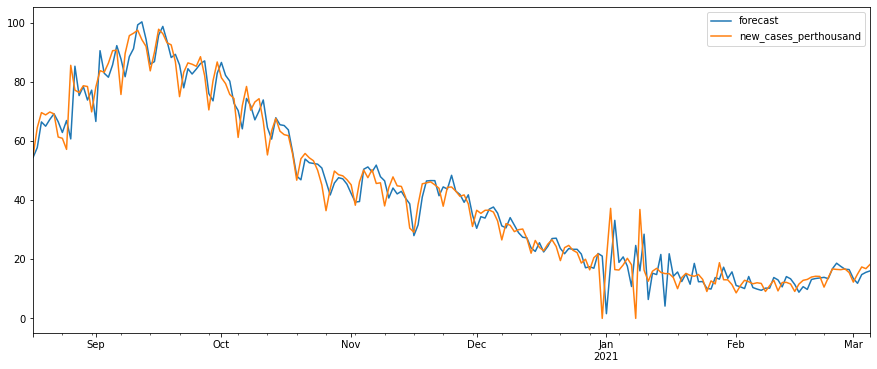

In [47]:
result.plot_predict(start =200, end=400,dynamic=False,)